In [ ]:
from os import listdir
import cv2

In [1]:
daisy_path = "flowers/daisy/"
dandelion_path = "flowers/dandelion/"
rose_path = "flowers/rose/"
sunflower_path = "flowers/sunflower/"
tulip_path = "flowers/tulip/"

In [22]:
def iter_images(images,directory,size,label):
    try:
        for i in range(len(images)):
            img = cv2.imread(directory + images[i])
            img = cv2.resize(img,size)
            img_data.append(img)
            labels.append(label)
    except:
        pass

img_data = []
labels = []
size = 64,64
iter_images(listdir(daisy_path),daisy_path,size,0)
iter_images(listdir(dandelion_path),dandelion_path,size,1)
iter_images(listdir(rose_path),rose_path,size,2)
iter_images(listdir(sunflower_path),sunflower_path,size,3)
iter_images(listdir(tulip_path),tulip_path,size,4)

In [23]:
len(img_data), len(labels)

(4323, 4323)

In [24]:
import numpy as np
data = np.array(img_data)
data.shape
data = data.astype('float32') / 255.0

labels = np.asarray(labels)

In [25]:
data.shape

(4323, 64, 64, 3)

In [26]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, shuffle= True)

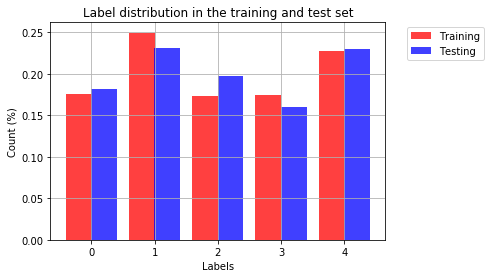

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

n_classes = 5

training_counts = [None] * n_classes 
testing_counts = [None] * n_classes
for i in range(n_classes):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)

# the histogram of the data
train_bar = plt.bar(np.arange(n_classes)-0.2, training_counts, align='center', color = 'r', alpha=0.75, width = 0.41, label='Training')
test_bar = plt.bar(np.arange(n_classes)+0.2, testing_counts, align='center', color = 'b', alpha=0.75, width = 0.41, label = 'Testing')

plt.xlabel('Labels')
plt.xticks((0,1,2,3,4))
plt.ylabel('Count (%)')
plt.title('Label distribution in the training and test set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar], loc=2)
plt.grid(True)
plt.show()

In [32]:
import keras

# The known number of output classes.
num_classes = 5

# Input image dimensions
img_rows, img_cols = 28, 28
input_shape = (64, 64, 3)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [42]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Convolution2D,MaxPool2D
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K

model = Sequential()
model.add(Convolution2D(32, (3,3),input_shape=(64, 64, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

batch_size = 128
epochs = 10
model.fit(x_train, y_train_binary,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_binary))

Train on 2896 samples, validate on 1427 samples
Epoch 1/10
2896/2896 [==============================] - 11s 4ms/step - loss: 1.6584 - acc: 0.2952 - val_loss: 1.5691 - val_acc: 0.2866
Epoch 2/10
2896/2896 [==============================] - 10s 4ms/step - loss: 1.3874 - acc: 0.4164 - val_loss: 1.3138 - val_acc: 0.4247
Epoch 3/10
2896/2896 [==============================] - 10s 4ms/step - loss: 1.2463 - acc: 0.4765 - val_loss: 1.2461 - val_acc: 0.4618
Epoch 4/10
2896/2896 [==============================] - 10s 4ms/step - loss: 1.2032 - acc: 0.5003 - val_loss: 1.1742 - val_acc: 0.5081
Epoch 5/10
2896/2896 [==============================] - 11s 4ms/step - loss: 1.1179 - acc: 0.5328 - val_loss: 1.1703 - val_acc: 0.5116
Epoch 6/10
2896/2896 [==============================] - 11s 4ms/step - loss: 1.0721 - acc: 0.5742 - val_loss: 1.1201 - val_acc: 0.5249
Epoch 7/10
2896/2896 [==============================] - 11s 4ms/step - loss: 1.0154 - acc: 0.5984 - val_loss: 1.1528 - val_acc: 0.5179
Epoch 8

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# utility function for showing images
def show_imgs(x_test, decoded_imgs=None, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        if decoded_imgs is not None:
            ax = plt.subplot(2, n, i+ 1 +n)
            plt.imshow(decoded_imgs[i].reshape(28,28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
    plt.show()

In [49]:
print('Predict the classes: ')
prediction = model.predict_classes(x_test[0:1])
print('Predicted class: ', prediction)
print('Real class:  ', y_test[0:1])

Predict the classes: 
1/1 [==============================] - 0s 6ms/step
Predicted class:  [4]
Real class:   [4]


In [48]:
y_test[0:1]

array([4])